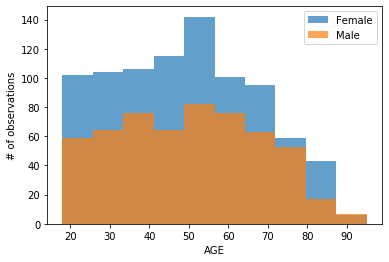

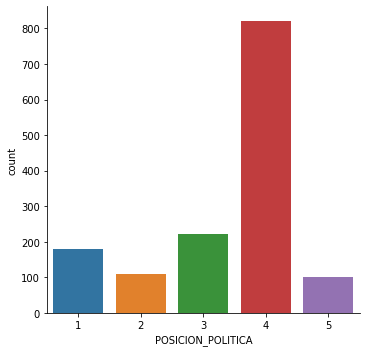

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

#Import Data from april 2015 CEP Survey
#REFERENCE: https://www.cepchile.cl/cep/encuestas-cep/encuestas-2009-2018/estudio-nacional-de-opinion-publica-abril-2015
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/Spatial%20Theory%20Chile/Encuesta%20CEP%2073%20Abril%202015.csv", index_col='FILTRO')
###PENDING: IMPORT FROM SPSS FILE


##count plot for regions
#sns.catplot(y="REGION",data=cep73,kind='count') 
#plt.show()

#histogram for age/sex
fig, ax = plt.subplots()
ax.hist(cep73[cep73["SEXO_ENTREV"]==2]["EDAD_ENTREV"],label="Female",alpha=0.7)
ax.hist(cep73[cep73["SEXO_ENTREV"]==1]["EDAD_ENTREV"],label="Male",alpha=0.7)
ax.set_xlabel("AGE")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

#count plot for regions
sns.catplot(x="POSICION_POLITICA",data=cep73,kind='count') 
plt.show()





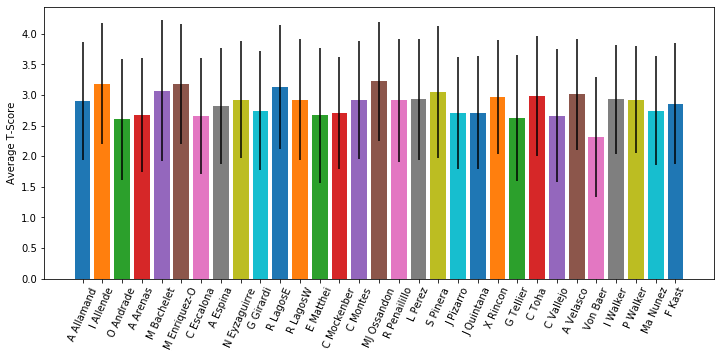

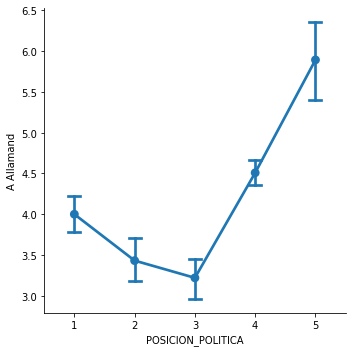

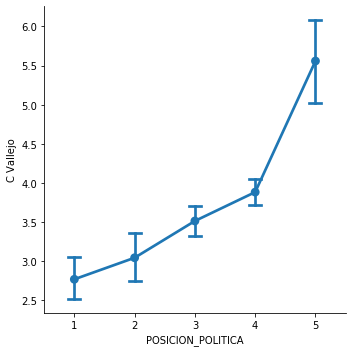

In [15]:
#Rename T Score Columns
cep73=cep73.rename(columns={"MB_P19_A":"A Allamand","MB_P19_B":"I Allende","MB_P19_C":"O Andrade","MB_P19_D":"A Arenas","MB_P19_E":"M Bachelet","MB_P19_F":"M Enriquez-O","MB_P19_G":"C Escalona","MB_P19_H":"A Espina","MB_P19_I":"N Eyzaguirre","MB_P19_J":"G Girardi","MB_P19_K":"R LagosE","MB_P19_L":"R LagosW","MB_P19_M":"E Matthei","MB_P19_N":"C Mockenber","MB_P19_O":"C Montes","MB_P19_P":"MJ Ossandon","MB_P19_Q":"R Penailillo",  "MB_P19_R":"L Perez","MB_P19_S":"S Pinera","MB_P19_T":"J Pizarro","MB_P19_U":"J Quintana","MB_P19_V":"X Rincon","MB_P19_W":"G Tellier","MB_P19_X":"C Toha","MB_P19_Y":"C Vallejo","MB_P19_Z":"A Velasco","MB_P19_AA":"Von Baer","MB_P19_BB":"I Walker", "MB_P19_CC":"P Walker","MB_P19_DD":"Ma Nunez","MB_P19_EE":"F Kast"})
#cep73.columns = cep73.columns.str.replace('F', 'C') 

#Thermometer Scores matrix
T = cep73.iloc[:,33:64]
#Enconde missing values
T[T>5]=np.nan  
cep73.iloc[:,33:64][cep73.iloc[:,33:64]>5]=np.nan #PENDING:CHECK
#print(T.shape)
#T = T*20
#T =(100-T)/50#

#Average rating 
Tcolumns = list(T)
fig, ax = plt.subplots()
for polititian in Tcolumns :
    ax.bar(polititian, T[polititian].mean(), yerr=T[polititian].std())
ax.set_xticklabels(Tcolumns, rotation=66)
ax.set_ylabel("Average T-Score") 
fig.set_size_inches([12, 5])
plt.show()

sns.catplot(data=cep73,x="POSICION_POLITICA",y="A Allamand",kind="point",capsize=0.2) #CONVERT POSICION_POLITICA TO CATEGORICAL/OR IMPORT FROM SPSS
plt.show()
sns.catplot(data=cep73,x="POSICION_POLITICA",y="C Vallejo",kind="point",capsize=0.2) #CONVERT POSICION_POLITICA TO CATEGORICAL/OR IMPORT FROM SPSS
plt.show()
##PENDING convert T TO LONG TO COMPARE IN SAME PLOT


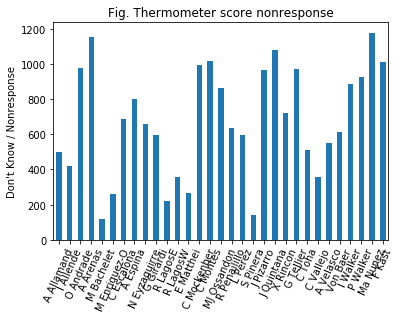

In [49]:
#Graph for political knowledge   
T.isna().sum().plot(kind="bar")
plt.xlabel("")
plt.ylabel("Don't Know / Nonresponse")
plt.title("Fig. Thermometer score nonresponse")
plt.xticks(rotation=66)
#plt.set_size_inches([12, 5])
plt.show()    

In [ ]:
#Missing Values removed *Temporarily* #Missing value imputation
T= T.dropna()
#print(T)

#PENDING: MAKE COUNTER FOR NA in ROWS
